In [1]:
import random
from collections import deque, namedtuple

In [2]:
# https://nbviewer.jupyter.org/github/norvig/pytudes/blob/master/ipynb/Maze.ipynb
def Edge(node1, node2): return tuple(sorted([node1, node2]))

def random_tree(nodes: set, neighbors: callable, pop: callable) -> [Edge]:
    "Repeat: pop a node and add Edge(node, nbr) until all nodes have been added to tree."
    tree = []
    root = nodes.pop()
    frontier = deque([root])
    while nodes:
        node = pop(frontier)
        nbrs = neighbors(node) & nodes
        if nbrs:
            nbr = random.choice(list(nbrs))
            tree.append(Edge(node, nbr))
            nodes.remove(nbr)
            frontier.extend([node, nbr])
    return tree

In [3]:
Maze = namedtuple('Maze', 'width, height, edges')

def neighbors4(square):
    "The 4 neighbors of an (x, y) square."
    (x, y) = square
    return {(x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1)}

def squares(width, height): 
    "All squares in a grid of these dimensions."
    return {(x, y) for x in range(width) for y in range(height)}

def random_maze(width, height, pop=deque.pop):
    "Use random_tree to generate a random maze."
    nodes = squares(width, height)
    tree = random_tree(nodes, neighbors4, pop)
    return Maze(width, height, tree)  

In [4]:
random_maze(10,5)

Maze(width=10, height=5, edges=[((6, 3), (7, 3)), ((6, 2), (6, 3)), ((6, 1), (6, 2)), ((5, 1), (6, 1)), ((5, 0), (5, 1)), ((4, 0), (5, 0)), ((4, 0), (4, 1)), ((3, 1), (4, 1)), ((3, 0), (3, 1)), ((2, 0), (3, 0)), ((2, 0), (2, 1)), ((1, 1), (2, 1)), ((1, 0), (1, 1)), ((0, 0), (1, 0)), ((0, 0), (0, 1)), ((0, 1), (0, 2)), ((0, 2), (0, 3)), ((0, 3), (1, 3)), ((1, 2), (1, 3)), ((1, 2), (2, 2)), ((2, 2), (3, 2)), ((3, 2), (3, 3)), ((3, 3), (4, 3)), ((4, 3), (4, 4)), ((3, 4), (4, 4)), ((2, 4), (3, 4)), ((1, 4), (2, 4)), ((0, 4), (1, 4)), ((2, 3), (2, 4)), ((4, 4), (5, 4)), ((5, 4), (6, 4)), ((6, 4), (7, 4)), ((7, 4), (8, 4)), ((8, 4), (9, 4)), ((9, 3), (9, 4)), ((9, 2), (9, 3)), ((8, 2), (9, 2)), ((7, 2), (8, 2)), ((7, 1), (7, 2)), ((7, 1), (8, 1)), ((8, 0), (8, 1)), ((7, 0), (8, 0)), ((6, 0), (7, 0)), ((8, 0), (9, 0)), ((9, 0), (9, 1)), ((8, 2), (8, 3)), ((5, 3), (5, 4)), ((5, 2), (5, 3)), ((4, 2), (5, 2))])

In [5]:
def print_maze(maze, dot='o', lin='--', bar='|', sp='  '):
    "Print maze in ASCII."
    exit = Edge((maze.width-1, maze.height-1), (maze.width-1, maze.height))
    edges = set(maze.edges) | {exit}
    print(dot + sp + lin.join(dot * maze.width)) # Top line, including entrance
    def vert_wall(x, y): return (' ' if Edge((x, y), (x+1, y)) in edges else bar)
    def horz_wall(x, y): return (sp  if Edge((x, y), (x, y+1)) in edges else lin)
    for y in range(maze.height):
        print(bar + cat(sp + vert_wall(x, y) for x in range(maze.width)))
        print(dot + cat(horz_wall(x, y) + dot for x in range(maze.width)))
        
cat = ''.join
        
print_maze(random_maze(10, 5))

o  o--o--o--o--o--o--o--o--o--o
|  |              |           |
o  o  o--o--o--o  o  o--o  o  o
|  |           |     |  |  |  |
o  o--o--o--o  o--o--o  o  o--o
|  |        |  |        |     |
o  o  o--o  o  o  o--o--o  o  o
|     |  |  |     |     |  |  |
o  o--o  o  o--o  o  o--o--o  o
|        |        |           |
o--o--o--o--o--o--o--o--o--o  o


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_maze(maze):
    "Plot a maze by drawing lines between adjacent squares, except for pairs in maze.edges"
    plt.figure(figsize=(8, 4))
    plt.axis('off')
    plt.gca().invert_yaxis()
    w, h  = maze.width, maze.height
    exits = {Edge((0, 0), (0, -1)), Edge((w-1, h-1), (w-1, h))}
    edges = set(maze.edges) | exits
    for sq in squares(w, h):
        for nbr in neighbors4(sq):
            if Edge(sq, nbr) not in edges:
                plot_wall(sq, nbr)
    plt.show()

def plot_wall(s1, s2):
    "Plot a thick black line between squares s1 and s2."
    (x1, y1), (x2, y2) = s1, s2
    if x1 == x2: # horizontal wall
        y = max(y1, y2)
        X, Y = [x1, x1+1], [y, y]
    else: # vertical wall
        x = max(x1, x2)
        X, Y = [x, x], [y1, y1+1]
    plt.plot(X, Y, 'k-', linewidth=4.0)

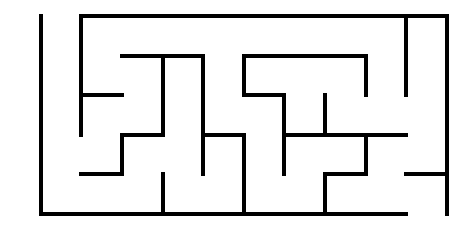

o  o--o--o--o--o--o--o--o--o--o
|  |                       |  |
o  o  o--o--o  o--o--o--o  o  o
|  |     |  |  |        |  |  |
o  o--o  o  o  o--o  o  o  o  o
|  |     |  |     |  |        |
o  o  o--o  o--o  o--o--o--o  o
|     |     |  |  |     |     |
o  o--o  o  o  o  o  o--o  o--o
|        |     |     |        |
o--o--o--o--o--o--o--o--o--o  o


In [7]:
M = random_maze(10, 5)
plot_maze(M)  
print_maze(M)

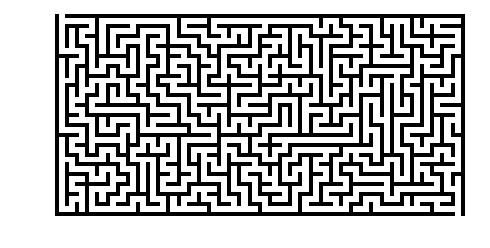

In [8]:
plot_maze(random_maze(40, 20, deque.pop))

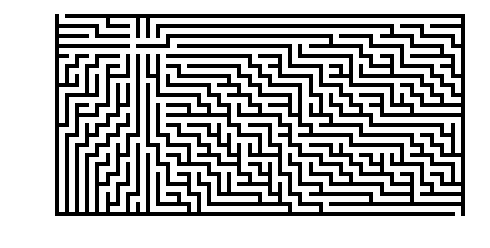

In [9]:
plot_maze(random_maze(40, 20, deque.popleft))

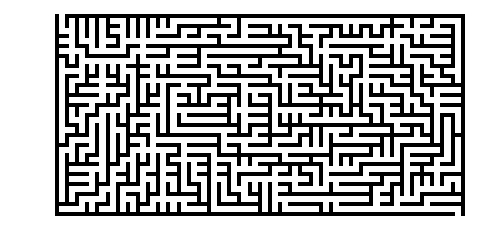

In [10]:
def poprandom(seq):
    "Shuffle a mutable sequence (deque or list) and then pop an element."
    random.shuffle(seq)
    return seq.pop()

plot_maze(random_maze(40, 20, poprandom))